In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
from data import *

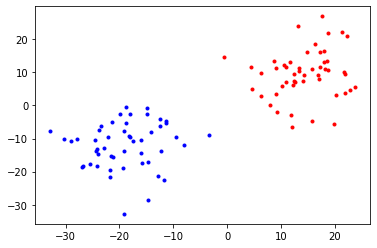

In [3]:
plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [4]:
lambd = cp.Variable(shape=(100,))
M = np.concatenate((X, -Y), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [5]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(50, 100)
True
[4.65163889e+05+0.00000000e+00j 1.79169939e+04+0.00000000e+00j
 1.69909549e+04+0.00000000e+00j 1.57166879e+04+0.00000000e+00j
 1.43997251e+04+0.00000000e+00j 1.35757548e+04+0.00000000e+00j
 1.30565373e+04+0.00000000e+00j 1.19165148e+04+0.00000000e+00j
 1.13666783e+04+0.00000000e+00j 9.88722032e+03+0.00000000e+00j
 9.26269188e+03+0.00000000e+00j 8.80752462e+03+0.00000000e+00j
 8.45444283e+03+0.00000000e+00j 7.72338328e+03+0.00000000e+00j
 7.41493888e+03+0.00000000e+00j 7.12076940e+03+0.00000000e+00j
 6.69014491e+03+0.00000000e+00j 6.07341083e+03+0.00000000e+00j
 6.01646665e+03+0.00000000e+00j 4.87088920e+03+0.00000000e+00j
 4.30635469e+03+0.00000000e+00j 4.14601749e+03+0.00000000e+00j
 3.77978747e+03+0.00000000e+00j 3.61164935e+03+0.00000000e+00j
 3.47551210e+03+0.00000000e+00j 2.61349331e+03+0.00000000e+00j
 2.78817208e+03+0.00000000e+00j 2.85608407e+03+0.00000000e+00j
 2.37172532e+03+0.00000000e+00j 2.23614107e+03+0.00000000e+00j
 2.12842523e+03+0.00000000e+0

In [6]:
objective = cp.Minimize(-cp.sum(lambd) + 0.5*cp.quad_form(lambd, D))
constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-0.0001475478535173157

In [7]:
lambd.value

array([1.28851177e-10, 2.45541944e-10, 1.52547187e-09, 2.10612339e-10,
       1.37043194e-05, 2.32301016e-10, 1.96794667e-10, 1.10820066e-10,
       2.08023963e-10, 1.82758960e-10, 1.02517796e-10, 2.15059696e-10,
       2.71199928e-10, 2.27191918e-08, 2.44192897e-10, 3.23942786e-10,
       2.25839225e-10, 1.71233251e-10, 7.21986831e-10, 1.79760431e-10,
       2.14916157e-10, 3.92368325e-09, 2.13651725e-10, 2.61796295e-10,
       4.76121867e-10, 2.55849367e-10, 2.46912443e-10, 5.94278306e-05,
       2.93692671e-05, 9.64864524e-11, 2.00341009e-10, 1.99466242e-05,
       3.72717771e-10, 3.00465969e-10, 1.03512178e-10, 2.50418930e-05,
       5.62467954e-10, 6.64381992e-10, 5.34733237e-10, 2.54787166e-10,
       4.51111704e-10, 1.35683445e-10, 3.36916372e-10, 1.02757342e-09,
       1.23625654e-10, 2.01496371e-10, 2.69548534e-10, 1.97143662e-10,
       1.83503264e-10, 1.83024474e-10, 1.82334831e-10, 2.18752155e-10,
       1.68916381e-10, 8.91956917e-10, 5.66183210e-09, 1.37987623e-09,
      

In [8]:
w = np.sum(np.multiply(lambd.value,M), axis=1)

In [9]:
print(w.shape)
print(M[:, 23].shape)

(50, 1)
(50, 1)


In [10]:
index = np.argmax(lambd.value)

In [11]:
b = 1 - (w.T@M[:,index])[0,0]

In [12]:
b

0.02383312584157904

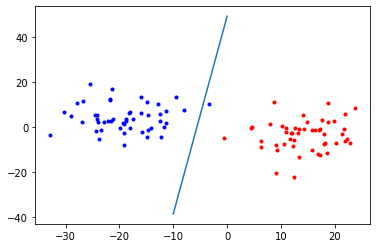

In [13]:
i1 = 0
i2 = 28
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
x = np.linspace(-10, 0, 100)
y = -(w[i1, 0]*x + b)/w[i2, 0]
plt.plot(x, y)
plt.show()